In [2]:
import numpy
import matplotlib.pyplot as plt
import os

SAMPLEFREQ = 44100

In [5]:
import pyaudio


def aufnahme():
    FORMAT = pyaudio.paInt16
    FRAMESIZE = 1024
    NOFFRAMES = 220
    p = pyaudio.PyAudio()
    print("running")
    stream = p.open(format=FORMAT,channels=1,rate=SAMPLEFREQ,
    input=True,frames_per_buffer=FRAMESIZE)
    data = stream.read(NOFFRAMES*FRAMESIZE)
    decoded = numpy.frombuffer(data,dtype=numpy.int16);
    stream.stop_stream()
    stream.close()
    p.terminate()
    print("done")
    numpy.save("../Versuch4/file",decoded)
    plt.plot(decoded)
    plt.show()
#aufnahme()

ModuleNotFoundError: No module named 'pyaudio'

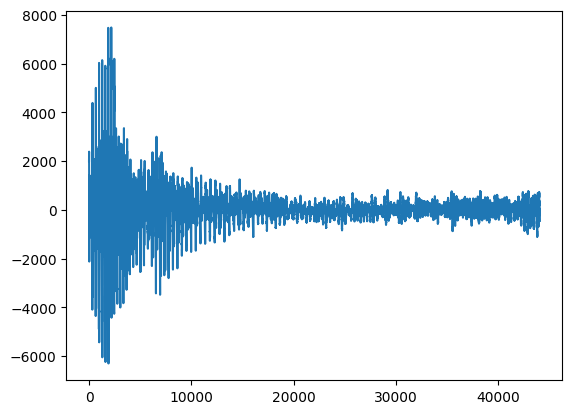

In [3]:

def trigger(path, threshold):
    sample = numpy.load(path)
    x = []
    for i in range(len(sample)):
        if sample[i] >= threshold:
            x = sample[i:]
            break
    return x[0:SAMPLEFREQ]


test = trigger("./file.npy",2000)
plt.plot(test)

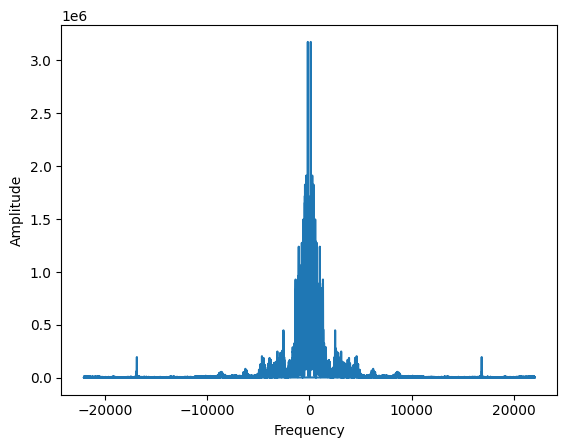

In [4]:

def calculate_amplitude_spectrum(signal):
    n = len(signal)
    frequencies = numpy.fft.fftfreq(n, d=1/SAMPLEFREQ)
    spectrum = numpy.fft.fft(signal)
    amplitude_spectrum = numpy.abs(spectrum)
    return frequencies, amplitude_spectrum

frequencies, amplitude_spectrum = calculate_amplitude_spectrum(test)
plt.plot(frequencies, amplitude_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


Windowing

In [ ]:
def cutInWindows(signal):
    windows = numpy.array
    for i in range(len(signal)):
        
        
        


Aufgabe 2.1

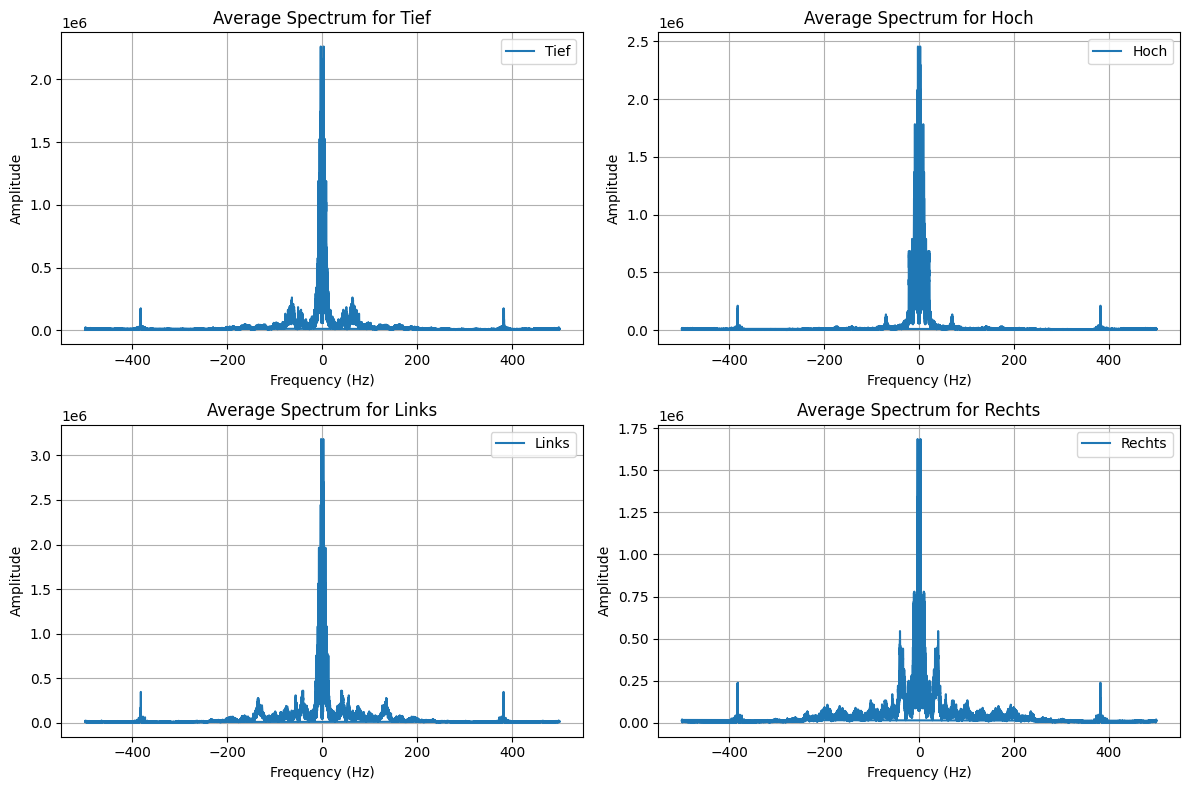

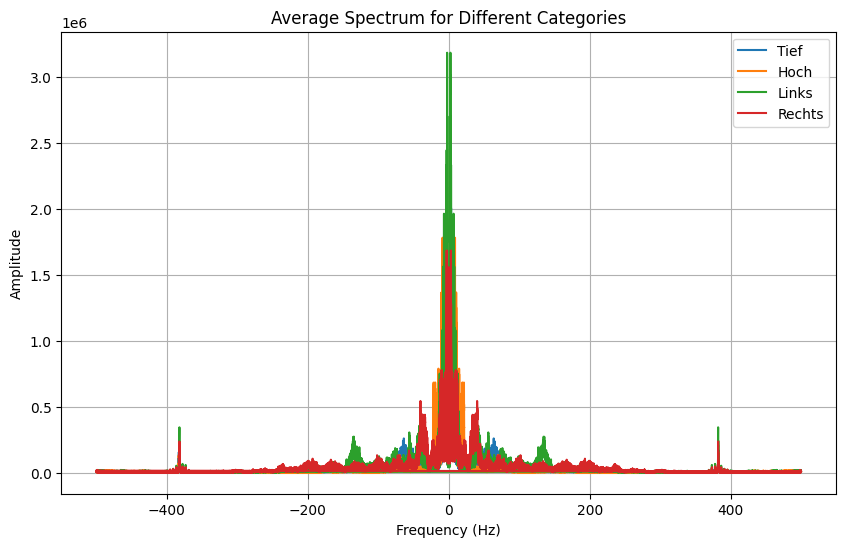

In [33]:
folder_path = './test/'


tief_arrays = {f'tief{i}': numpy.load(os.path.join(folder_path, f"tief{i}.npy")) for i in range(5)}
hoch_arrays = {f'hoch{i}': numpy.load(os.path.join(folder_path, f"hoch{i}.npy")) for i in range(5)}
links_arrays = {f'links{i}': numpy.load(os.path.join(folder_path, f"links{i}.npy")) for i in range(5)}
rechts_arrays = {f'rechts{i}': numpy.load(os.path.join(folder_path, f"rechts{i}.npy")) for i in range(5)}

def plot_average_spectrum(category, arrays, ax=None):
    average_spectrum = numpy.mean([calculate_amplitude_spectrum(arr)[1] for arr in arrays.values()], axis=0)
    ax.plot(calculate_amplitude_spectrum(list(arrays.values())[0])[0], average_spectrum, label=category)
    ax.set_title(f'Average Spectrum for {category}')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    ax.legend()
    ax.grid(True)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

plot_average_spectrum('Tief', tief_arrays, ax=axes[0, 0])
plot_average_spectrum('Hoch', hoch_arrays, ax=axes[0, 1])
plot_average_spectrum('Links', links_arrays, ax=axes[1, 0])
plot_average_spectrum('Rechts', rechts_arrays, ax=axes[1, 1])

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))

plot_average_spectrum('Tief', tief_arrays, plt.gca())
plot_average_spectrum('Hoch', hoch_arrays, plt.gca())
plot_average_spectrum('Links', links_arrays, plt.gca())
plot_average_spectrum('Rechts', rechts_arrays, plt.gca())

plt.title('Average Spectrum for Different Categories')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
